In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 타이타닉 데이터 생존자수 예측 모델 만들기
![TItanic-Survival-Infographic](https://user-images.githubusercontent.com/46340424/61845049-ab362000-aedc-11e9-9f02-e5663652c524.jpg)

In [2]:
train = pd.read_csv("./titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv("./titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.shape, test.shape

((891, 12), (418, 11))

# 가설 설정
## 성별에 따른 생존여부
## 좌석 계층에 따른 생존 여부
## 항구목적지에 따른 생존여부
## 가족 수에 따른 생존여부

In [5]:
def bar_chart(feature):
    survived = train[train["Survived"] == 1][feature].value_counts()
    dead = train[train["Survived"] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead], index = ["Survived", "Dead"])
    df.plot.bar(stacked = True, figsize = (10, 5), )
    plt.legend(loc = (1.2, 0.5))
    plt.show()

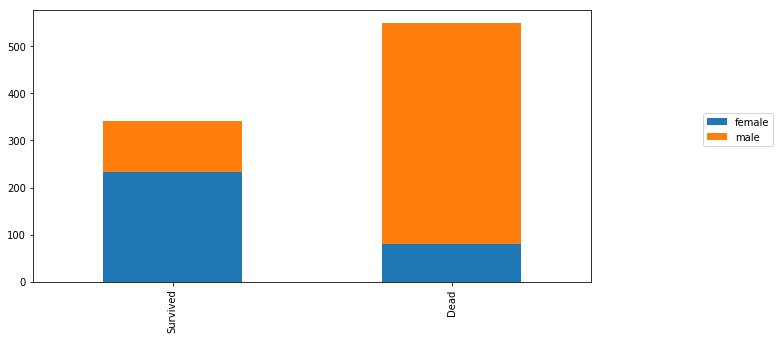

In [6]:
bar_chart("Sex")

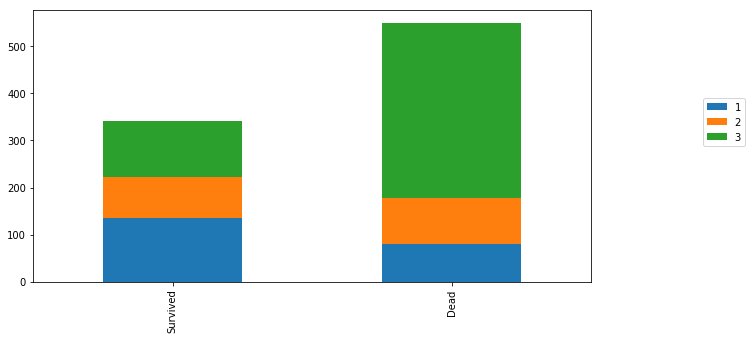

In [7]:
bar_chart("Pclass")

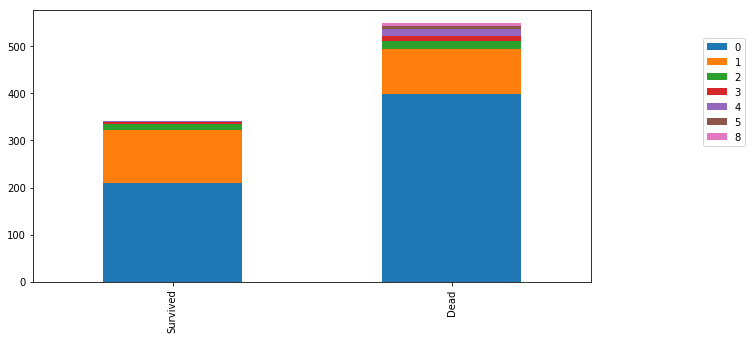

In [8]:
bar_chart("SibSp")

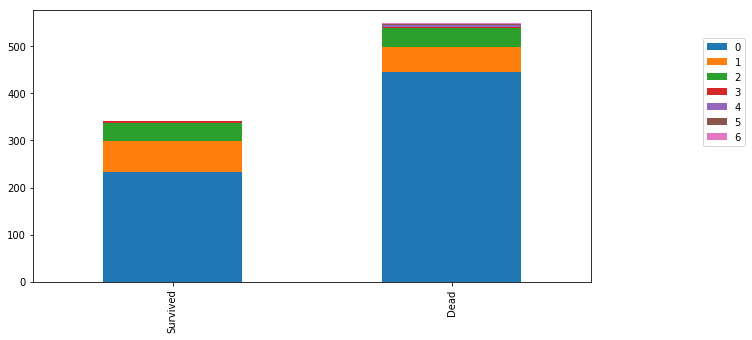

In [9]:
bar_chart("Parch")

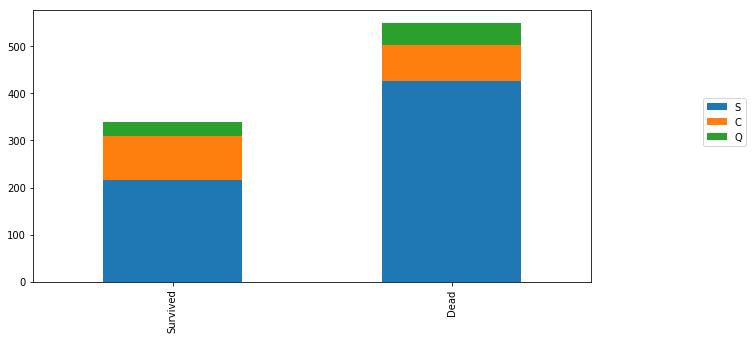

In [10]:
bar_chart("Embarked")

# 각 결측치 파악하기

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [13]:
train_test_data = [train, test]

In [14]:
def judge():
    for dataset in train_test_data:
        print(dataset.isna().sum() / dataset.shape[0], "\n")

In [15]:
judge()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64 

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64 



# Embarked 결측치 처리

In [16]:
train[train["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [17]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
train[train["Embarked"].isna()] = train[train["Embarked"].isna()].fillna("S")

In [19]:
judge()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.000000
dtype: float64 

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64 



# 이름의 정보 추출하기

In [20]:
for dataset in train_test_data:
    dataset["Title"] = dataset["Name"].str.extract(' ([A-Za-z]+)\.')

In [21]:
for dataset in train_test_data:
    dataset.drop("Name", axis = 1, inplace = True)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [23]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [24]:
pd.crosstab(train["Title"], train["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [25]:
pd.crosstab(test["Title"], test["Sex"])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [26]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [27]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [28]:
train[["Title", "Survived"]].groupby("Title").mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


In [29]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [30]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [31]:
test[test["Fare"].isna()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
152,1044,3,male,60.5,0,0,3701,NaN,NaN,S,Mr


In [32]:
test[["Fare", "Title"]].groupby("Title").median()

,Fare
Title,
Master,21.07500
Miss,13.50000
Mr,10.50000
Mrs,27.72080
Rare,55.17915


In [33]:
test[test["Fare"].isna()] = test[test["Fare"].isna()].fillna(10.5)

In [34]:
judge()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.000000
Title          0.000000
dtype: float64 

PassengerId    0.000000
Pclass         0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.779904
Embarked       0.000000
Title          0.000000
dtype: float64 



# Age 결측치 채우기

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


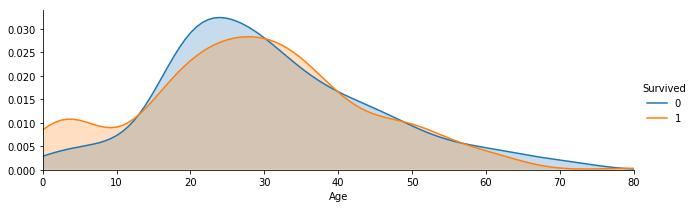

In [35]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 3)
facet.map(sns.kdeplot, "Age", shade = True)
facet.set(xlim = (0, train["Age"].max()))
facet.add_legend()
plt.show()

In [36]:
for dataset in train_test_data:
    dataset["Age"].fillna(dataset.groupby("Pclass")["Age"].transform("median"), inplace = True)

In [37]:
judge()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.000000
Title          0.000000
dtype: float64 

PassengerId    0.000000
Pclass         0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.779904
Embarked       0.000000
Title          0.000000
dtype: float64 



In [38]:
for dataset in train_test_data:
    dataset.drop("Ticket",axis = 1, inplace = True)

In [39]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,NaN,S,Mr


In [40]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,NaN,Q,Mr
1,893,3,female,47.0,1,0,7.0000,NaN,S,Mrs
2,894,2,male,62.0,0,0,9.6875,NaN,Q,Mr
3,895,3,male,27.0,0,0,8.6625,NaN,S,Mr
4,896,3,female,22.0,1,1,12.2875,NaN,S,Mrs


# Cabin 결측치 처리하기

In [41]:
for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].map(lambda x : x[0] if type(x) == str else "0")

In [42]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,0,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,0,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,C,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,0,S,Mr


In [43]:
for dataset in train_test_data:
    dataset["IsCabin"] = 1
    dataset.loc[dataset["Cabin"] == "0", "IsCabin"] = 0

In [44]:
for dataset in train_test_data:
    dataset.drop("Cabin", axis = 1, inplace = True)

# Fare 처리하기

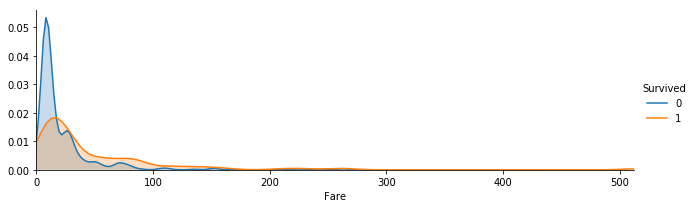

In [45]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 3)
facet.map(sns.kdeplot, "Fare", shade = True)
facet.set(xlim = (0, train["Fare"].max()))
facet.add_legend()
plt.show()

In [46]:
for dataset in train_test_data:
    dataset.loc[dataset["Fare"] <= 7.91, "Fare"] = 0
    dataset.loc[(dataset["Fare"] > 7.91) & (dataset["Fare"] <= 14.454), "Fare"] = 1
    dataset.loc[(dataset["Fare"] > 14.454) & (dataset["Fare"] <= 31.0), "Fare"] = 2
    dataset.loc[dataset["Fare"] > 31.0, "Fare"] = 3
    dataset["Fare"] = dataset["Fare"].astype(int)

# Family 변수 만들기

In [47]:
for dataset in train_test_data:
    dataset["Family"] = dataset["SibSp"] + dataset["Parch"]

In [48]:
for dataset in train_test_data:
    dataset.drop(["SibSp", "Parch"], axis = 1, inplace = True)

In [51]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsCabin,Family
0,1,0,3,male,22.0,0,S,Mr,0,1
1,2,1,1,female,38.0,3,C,Mrs,1,1
2,3,1,3,female,26.0,1,S,Miss,0,0
3,4,1,1,female,35.0,3,S,Mrs,1,1
4,5,0,3,male,35.0,1,S,Mr,0,0


In [52]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsCabin,Family
0,892,3,male,34.5,0,Q,Mr,0,0
1,893,3,female,47.0,0,S,Mrs,0,1
2,894,2,male,62.0,1,Q,Mr,0,0
3,895,3,male,27.0,1,S,Mr,0,0
4,896,3,female,22.0,1,S,Mrs,0,2


In [53]:
for dataset in train_test_data:
    dataset["IsAlone"] = 0
    dataset.loc[dataset["Family"] == 0, "IsAlone"] = 1

In [54]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsCabin,Family,IsAlone
0,1,0,3,male,22.0,0,S,Mr,0,1,0
1,2,1,1,female,38.0,3,C,Mrs,1,1,0
2,3,1,3,female,26.0,1,S,Miss,0,0,1
3,4,1,1,female,35.0,3,S,Mrs,1,1,0
4,5,0,3,male,35.0,1,S,Mr,0,0,1


In [55]:
for dataset in train_test_data:
    dataset.drop("Family", axis = 1, inplace = True)

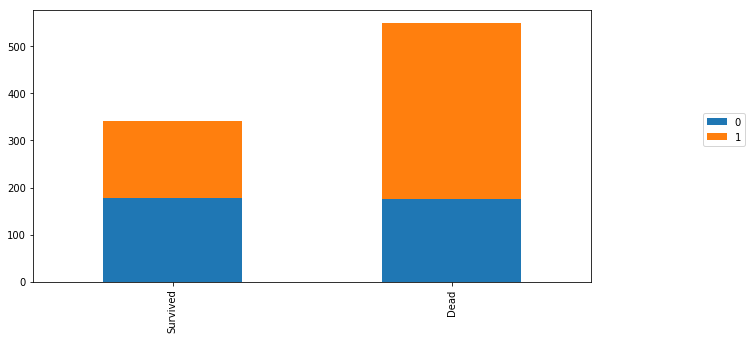

In [56]:
bar_chart("IsAlone")

In [57]:
train.groupby("IsAlone")["Survived"].mean()

IsAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

In [58]:
#나눈 순서에 따라서 숫자형 범주로 만듬
for dataset in train_test_data:
    dataset.loc[dataset["Age"] <= 16.0, "Age"] = 0
    dataset.loc[(dataset["Age"] > 16.0) & (dataset["Age"] <= 32.0), "Age"] = 1
    dataset.loc[(dataset["Age"] > 32.0) & (dataset["Age"] <= 48.0), "Age"] = 2
    dataset.loc[(dataset["Age"] > 48.0) & (dataset["Age"] < 64.0), "Age"] = 3
    dataset.loc[dataset["Age"] > 64.0, "Age"] = 4
    dataset["Age"] = dataset["Age"].astype(int)

In [59]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsCabin,IsAlone
0,1,0,3,male,1,0,S,Mr,0,0
1,2,1,1,female,2,3,C,Mrs,1,0
2,3,1,3,female,1,1,S,Miss,0,1
3,4,1,1,female,2,3,S,Mrs,1,0
4,5,0,3,male,2,1,S,Mr,0,1


In [60]:
for dataset in train_test_data:
    dataset["Age*Pclass"] = dataset.Age * dataset.Pclass

In [62]:
#이름 추출값도 숫자형 범주로 만듬
for dataset in train_test_data:
    dataset["Title"] = dataset["Title"].map({"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Rare": 4})

In [63]:
for dataset in train_test_data:
    dataset["Sex"] = dataset["Sex"].map({"male" : 0, "female" : 1})
    dataset["Embarked"] = dataset["Embarked"].map({"S" : 0, "C" : 1, "Q" : 2})

# 데이터 모델링 하기

In [64]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsCabin,IsAlone,Age*Pclass
0,1,0,3,0,1,0,0,0,0,0,3
1,2,1,1,1,2,3,1,2,1,0,2
2,3,1,3,1,1,1,0,1,0,1,3
3,4,1,1,1,2,3,0,2,1,0,2
4,5,0,3,0,2,1,0,0,0,1,6


In [65]:
train.drop("PassengerId", axis = 1, inplace = True)

In [66]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsCabin,IsAlone,Age*Pclass
0,0,3,0,1,0,0,0,0,0,3
1,1,1,1,2,3,1,2,1,0,2
2,1,3,1,1,1,0,1,0,1,3
3,1,1,1,2,3,0,2,1,0,2
4,0,3,0,2,1,0,0,0,1,6


In [67]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsCabin,IsAlone,Age*Pclass
0,892,3,0,2,0,2,0,0,1,6
1,893,3,1,2,0,0,2,0,0,6
2,894,2,0,3,1,2,0,0,1,6
3,895,3,0,1,1,0,0,0,1,3
4,896,3,1,1,1,0,2,0,0,3


In [68]:
from sklearn.model_selection import train_test_split

predictors = train.drop('Survived', axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

79.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [70]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

80.2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [71]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

82.23


In [72]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

85.28


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [73]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

83.76


In [74]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

78.68


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [75]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

86.29


In [76]:
#결과값 예측에 중요한 변수로 작동한 것이 무엇인지 알아보기 위해 도수 분포표를 만듬
pd.concat((pd.DataFrame(train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(gbk.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

,variable,importance
5,Title,0.593645
0,Pclass,0.155054
3,Fare,0.088765
4,Embarked,0.050497
6,IsCabin,0.029695
8,Age*Pclass,0.026261
1,Sex,0.025911
2,Age,0.019532
7,IsAlone,0.010640


In [77]:
predict = gbk.predict(test.drop("PassengerId", axis = 1))
submission = pd.DataFrame({"PassengerId" : test["PassengerId"], "Survived" : predict})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [78]:
submission.to_csv("submission_gbk.csv", index = False)